#### OTU as a function of fastq_maxee, min_size, fastq_trunclen

In [1]:
import os 
import subprocess
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fastq_dir = '~/fastqs/*_R1_*.fastq'

In [2]:
def usearch_func(maxee, trunclen, minsize):
    """return merge,filter,derep, and cluster outputs as a string """
    commands = ['usearch -fastq_mergepairs %s -relabel @ \
                         -fastqout merged.fastq' %fastq_dir,    
                
                'usearch -fastq_filter merged.fastq \
                         -fastq_maxee %f -fastq_trunclen %d \
                         -fastaout seqs.fna' %(maxee, trunclen), 
                
                'usearch -cluster_otus seqs.derep.fna -sizein -minsize %d \
                         -otus rep_set.fa -relabel OTU_' %minsize]
    output = ''
    for command in commands:
        out = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
        out_string = out.decode()   #python3 bytes to string
        output = '\n'.join([output, out_string])
    return output

In [3]:
def summarize_usearch(output_string):
    """return a list len = 3 of tuples (1000, 'FASTQ')"""
    search_list = [r'\d+\s+FASTQ', r'\d+\s+Converted', r'\d\d\sOTUs']
    res_list = []
    for pattern in search_list:
        match = re.search(pattern, output_string)
        matched_string = match.group()
        num, name = matched_string.split()
        num = int(num)
        res_list.append((num, name))
    return res_list

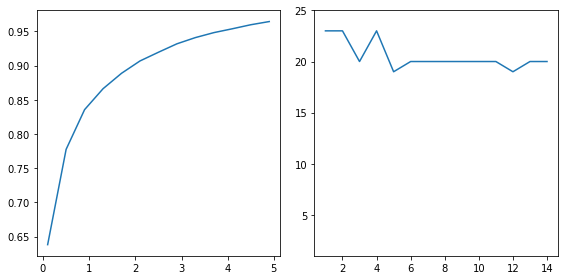

In [32]:
if __name__ == '__main__':
    """plot percent good reads vs maxee, and n_otus vs minsize"""

    maxees = [summarize_usearch(usearch_func(i, 250, 5)) for i in np.arange(0.1, 5.2, 0.4)]
    totalq = [(float(i[0][0])) for i in maxees]
    highq =  [(float(i[1][0])) for i in maxees]
    percent_good_reads = np.divide(np.array(highq), np.array(totalq))

    min_sizes = [summarize_usearch(usearch_func(1.0, 250, i)) for i in np.arange(1, 15)]
    n_otus = [i[2][0] for i in min_sizes]

    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(np.arange(0.1, 5.2, 0.4), percent_good_reads)
    ax2.plot(np.arange(1, 15), n_otus)
    ax2.set_ylim(1,25)
    fig.tight_layout()

In [ ]:
#otuTable = 'usearch -usearch_global merged.fastq -db rep_set.fa -id 0.97 -strand plus -biomout otu.json'
#subprocess.call(otuTable, shell=True)